<a href="https://colab.research.google.com/github/OliverPrism/time-series-forecasting/blob/main/Category_investigation_timesplit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
!pip install google-cloud-bigquery

In [65]:
from google.colab import auth
auth.authenticate_user()


In [66]:
from google.cloud import bigquery

client = bigquery.Client(project='prism-insights')

In [67]:
#Get transactions sales data, join with product attributes to get category, brand etc.

query = """
SELECT *
FROM `prism-insights.prism_insights_dev.stg_transactions_and_items` as t
LEFT JOIN `prism-insights.prism_insights_dev.stg_product_attributes` as a
ON t.item_id = a.item_id
ORDER BY transaction_date
"""
df = client.query(query).to_dataframe()
print(df.head())

  transaction_date transaction_id item_id  item_price  item_quantity  \
0       2020-01-01     1005433475  568811         2.0              1   
1       2020-01-01     1005433475  568815         2.0              1   
2       2020-01-01        5429400  813253         2.0              1   
3       2020-01-01        5429611  813275         2.0              1   
4       2020-01-01        5434294  813275         2.0              1   

   updated_at item_id_1 item_brand item_name    item_main_category  \
0  2023-11-30    568811      Prism      belt           Accessories   
1  2023-11-30    568815      Prism      belt           Accessories   
2  2023-11-30    813253      Prism     socks  Homewear & Underwear   
3  2023-11-30    813275      Prism     socks  Homewear & Underwear   
4  2023-11-30    813275      Prism     socks  Homewear & Underwear   

  item_sub_category item_gender  
0             Belts         Men  
1             Belts         Men  
2             Socks         Men  
3         

In [68]:
#Put date in index for easy pandas analysis

import pandas as pd
df["transaction_date"] = pd.to_datetime(df["transaction_date"])
df.set_index("transaction_date", inplace = True)
print(df.head())

                 transaction_id item_id  item_price  item_quantity  \
transaction_date                                                     
2020-01-01           1005433475  568811         2.0              1   
2020-01-01           1005433475  568815         2.0              1   
2020-01-01              5429400  813253         2.0              1   
2020-01-01              5429611  813275         2.0              1   
2020-01-01              5434294  813275         2.0              1   

                  updated_at item_id_1 item_brand item_name  \
transaction_date                                              
2020-01-01        2023-11-30    568811      Prism      belt   
2020-01-01        2023-11-30    568815      Prism      belt   
2020-01-01        2023-11-30    813253      Prism     socks   
2020-01-01        2023-11-30    813275      Prism     socks   
2020-01-01        2023-11-30    813275      Prism     socks   

                    item_main_category item_sub_category item_gende

In [69]:
#Optional: filter by 2021 data onwards only

df = df.loc["2021":"2022-07-24"]

In [70]:
#Explore how many items are bought per item per transaction

df["item_quantity"].value_counts()

1     552586
2      11215
3       1060
4        465
5        238
6        102
15        79
10        60
7         59
8         48
12        30
9         23
14        15
13        14
11         8
16         4
46         3
20         3
40         2
30         2
44         2
47         2
45         2
58         1
37         1
39         1
43         1
33         1
38         1
29         1
57         1
19         1
21         1
18         1
50         1
25         1
22         1
17         1
42         1
Name: item_quantity, dtype: Int64

In [71]:
#Total sales per week:

df_weekly = df.resample("W",origin='end_day')["item_quantity"].sum()

In [72]:
#Explore for a bit

df_weekly.head()


transaction_date
2021-01-03     701
2021-01-10    2549
2021-01-17    2446
2021-01-24    2050
2021-01-31    2310
Freq: W-SUN, Name: item_quantity, dtype: Int64

In [73]:
print(df_weekly.tail())
print(df.index.max())

transaction_date
2022-06-26    15438
2022-07-03    11638
2022-07-10     8067
2022-07-17     8493
2022-07-24    10516
Freq: W-SUN, Name: item_quantity, dtype: Int64
2022-07-24 00:00:00


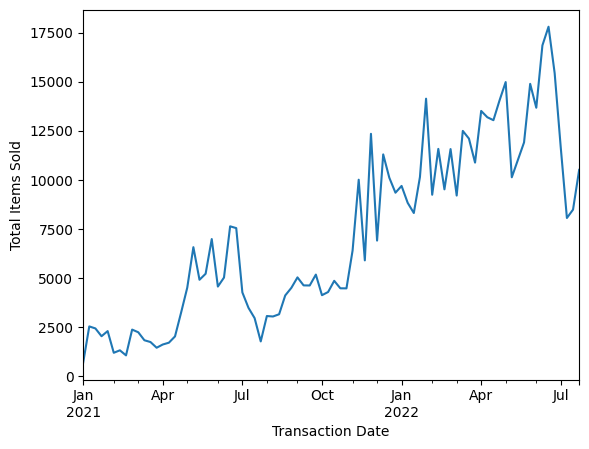

In [74]:
import matplotlib.pyplot as plt

df_weekly.plot()
plt.xlabel("Transaction Date")
plt.ylabel("Total Items Sold")
plt.show()

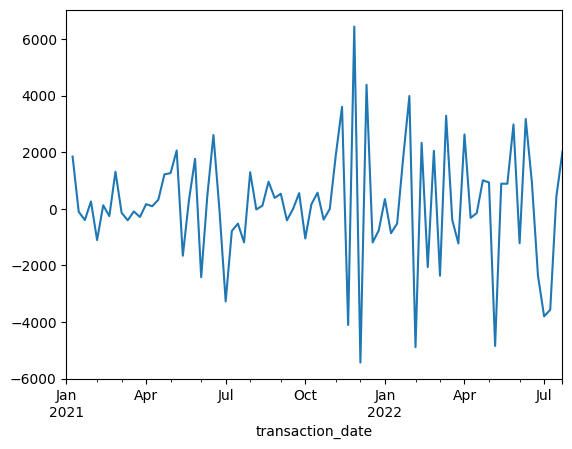

In [75]:
import matplotlib.pyplot as plt
df_weekly.diff().plot()
plt.show()

In [76]:
#Back to the main df

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 566038 entries, 2021-01-01 to 2022-07-24
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   transaction_id      566038 non-null  object 
 1   item_id             566038 non-null  object 
 2   item_price          566038 non-null  float64
 3   item_quantity       566038 non-null  Int64  
 4   updated_at          566038 non-null  dbdate 
 5   item_id_1           534312 non-null  object 
 6   item_brand          534312 non-null  object 
 7   item_name           534312 non-null  object 
 8   item_main_category  534312 non-null  object 
 9   item_sub_category   534312 non-null  object 
 10  item_gender         534312 non-null  object 
dtypes: Int64(1), dbdate(1), float64(1), object(8)
memory usage: 52.4+ MB


In [77]:
df.describe()

,item_price,item_quantity
count,566038.000000,566038.0
mean,18.817814,1.036519
std,21.657086,0.431791
min,0.500000,1.0
25%,6.000000,1.0
50%,12.000000,1.0
75%,25.000000,1.0
max,1250.000000,58.0


In [78]:
df.head()

,transaction_id,item_id,item_price,item_quantity,updated_at,item_id_1,item_brand,item_name,item_main_category,item_sub_category,item_gender
transaction_date,,,,,,,,,,,
2021-01-01,1009725724,761492,2.0,1,2023-11-30,761492,Prism,towel,Home & Decoration,Home & Decoration,Non-Gender
2021-01-01,1009722743,858044,2.0,1,2023-11-30,858044,Prism,socks,Homewear & Underwear,Socks,Men
2021-01-01,1009721815,929893,2.0,1,2023-11-30,929893,Pierre Cardin,after shave,Cosmetics & Makeup & Selfcare,Selfcare,Non-Gender
2021-01-01,1009728824,933508,2.0,1,2023-11-30,933508,Prism,t-shirt,Suits & Tops,T-shirts,Men
2021-01-01,1009725039,990278,2.0,1,2023-11-30,990278,Pierre Cardin,socks,Homewear & Underwear,Socks,Men


In [79]:

df = df.sort_values(by = ['transaction_date', 'transaction_id'], ascending = [True, True])

In [80]:
df.head()

,transaction_id,item_id,item_price,item_quantity,updated_at,item_id_1,item_brand,item_name,item_main_category,item_sub_category,item_gender
transaction_date,,,,,,,,,,,
2021-01-01,1009721076,984190,6.0,1,2023-11-30,984190,Pierre Cardin,shirt,Suits & Tops,Shirts,Men
2021-01-01,1009721495,964766,8.0,1,2023-11-30,964766,Hummel,sweatshirt,Suits & Tops,Sweatshirts,Children & Toddlers
2021-01-01,1009721570,966743,40.0,1,2023-11-30,966743,Under Armour,running shoes,Shoes & Bags,Shoes,Men
2021-01-01,1009721604,640476,45.0,1,2023-11-30,640476,George Hogg,boots,Shoes & Bags,Shoes,Men
2021-01-01,1009721815,929893,2.0,1,2023-11-30,929893,Pierre Cardin,after shave,Cosmetics & Makeup & Selfcare,Selfcare,Non-Gender


In [81]:
#Check for duplicates: None

df[df[["transaction_id","item_id"]].duplicated(keep = False)]

,transaction_id,item_id,item_price,item_quantity,updated_at,item_id_1,item_brand,item_name,item_main_category,item_sub_category,item_gender
transaction_date,,,,,,,,,,,


In [82]:
#Group weekly sales by category

df_weekly_cat = df.groupby("item_main_category")["item_quantity"].resample("W").sum()

In [83]:
#Rename cols
df_weekly_cat.columns = ["item_main_category", "item_quantity"]

In [84]:
df_weekly_cat.head()

item_main_category  transaction_date
Accessories         2021-01-03           28
                    2021-01-10          134
                    2021-01-17          122
                    2021-01-24          101
                    2021-01-31           80
Name: item_quantity, dtype: Int64

In [85]:
#Put item_main_category as column instead of index
df_weekly_cat = df_weekly_cat.reset_index(level = "item_main_category")

In [86]:
df_weekly_cat.head()

,item_main_category,item_quantity
transaction_date,,
2021-01-03,Accessories,28
2021-01-10,Accessories,134
2021-01-17,Accessories,122
2021-01-24,Accessories,101
2021-01-31,Accessories,80


In [87]:
#Make each main_category a column, instead of using a "tidy" table. This makes plotting very easy
df_weekly_unmelt = df_weekly_cat.pivot_table(values = "item_quantity",  index = "transaction_date", columns = "item_main_category", aggfunc="first")


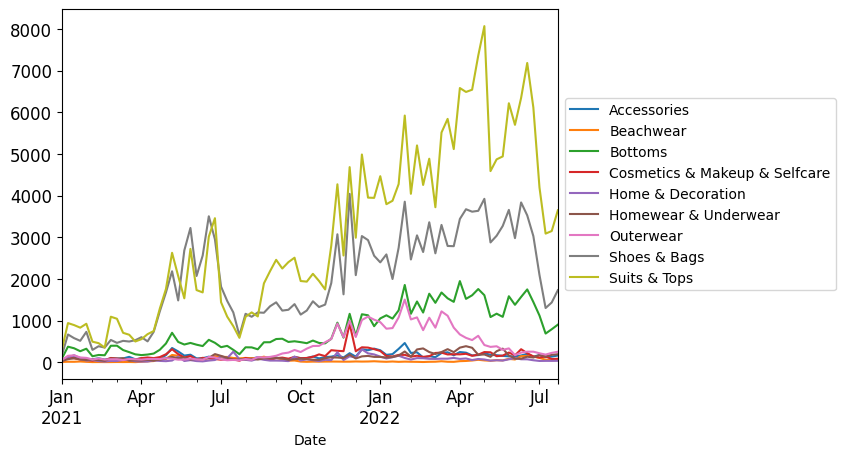

In [88]:
# Plot a chart
ax = df_weekly_unmelt.plot(fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.show()


In [89]:
#Get total sales across the period, to focus on key lines
df_tots = df_weekly_unmelt.sum()

In [90]:
#Proportion
df_tots/df_tots.sum()

item_main_category
Accessories                      0.022040
Beachwear                        0.006776
Bottoms                          0.115683
Cosmetics & Makeup & Selfcare    0.022524
Home & Decoration                0.010756
Homewear & Underwear             0.018982
Outerwear                        0.056674
Shoes & Bags                     0.295106
Suits & Tops                     0.451459
dtype: float64

In [91]:
import numpy as np
np.quantile(df_tots, 0.9)

180764.2

In [92]:
#Isolate top few categories
main_lines = df_tots[df_tots>np.quantile(df_tots, 0.6)].index
print(main_lines)

Index(['Bottoms', 'Outerwear', 'Shoes & Bags', 'Suits & Tops'], dtype='object', name='item_main_category')


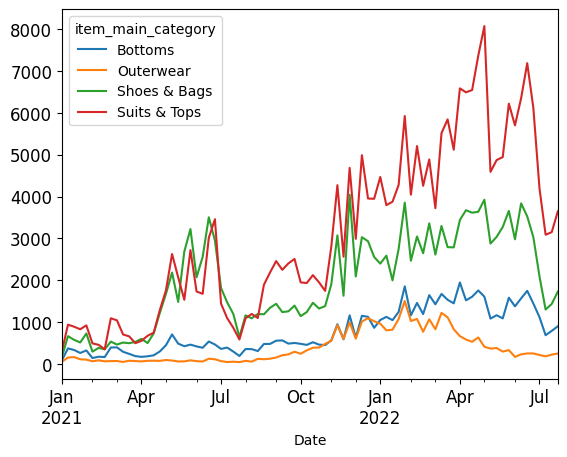

In [93]:
# Plot a chart
ax = df_weekly_unmelt.loc[:, main_lines].plot(fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
#ax.legend(fontsize=15)

# Show plot
plt.show()


In [94]:
df_weekly_unmelt.head()

item_main_category,Accessories,Beachwear,Bottoms,Cosmetics & Makeup & Selfcare,Home & Decoration,Homewear & Underwear,Outerwear,Shoes & Bags,Suits & Tops
transaction_date,,,,,,,,,
2021-01-03,28,4,84,32,19,26,50,160,298
2021-01-10,134,9,371,102,109,70,152,664,938
2021-01-17,122,8,333,92,167,95,163,576,890
2021-01-24,101,15,262,66,92,62,112,512,828
2021-01-31,80,7,322,60,38,52,102,727,922


In [95]:
df_weekly_cat.head()

,item_main_category,item_quantity
transaction_date,,
2021-01-03,Accessories,28
2021-01-10,Accessories,134
2021-01-17,Accessories,122
2021-01-24,Accessories,101
2021-01-31,Accessories,80


In [96]:
df.head()

,transaction_id,item_id,item_price,item_quantity,updated_at,item_id_1,item_brand,item_name,item_main_category,item_sub_category,item_gender
transaction_date,,,,,,,,,,,
2021-01-01,1009721076,984190,6.0,1,2023-11-30,984190,Pierre Cardin,shirt,Suits & Tops,Shirts,Men
2021-01-01,1009721495,964766,8.0,1,2023-11-30,964766,Hummel,sweatshirt,Suits & Tops,Sweatshirts,Children & Toddlers
2021-01-01,1009721570,966743,40.0,1,2023-11-30,966743,Under Armour,running shoes,Shoes & Bags,Shoes,Men
2021-01-01,1009721604,640476,45.0,1,2023-11-30,640476,George Hogg,boots,Shoes & Bags,Shoes,Men
2021-01-01,1009721815,929893,2.0,1,2023-11-30,929893,Pierre Cardin,after shave,Cosmetics & Makeup & Selfcare,Selfcare,Non-Gender


In [97]:
df["item_main_category"].value_counts()

Suits & Tops                     241763
Shoes & Bags                     159433
Bottoms                           61447
Outerwear                         30925
Accessories                       11789
Cosmetics & Makeup & Selfcare     11568
Homewear & Underwear               9017
Home & Decoration                  4689
Beachwear                          3681
Name: item_main_category, dtype: int64

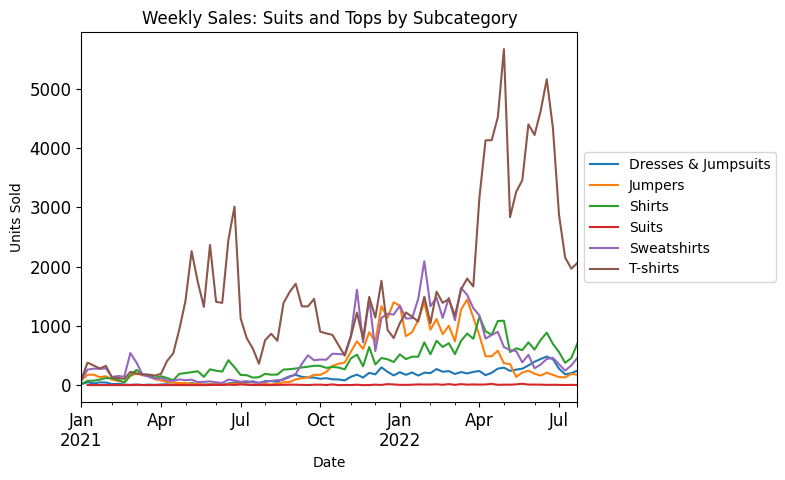

In [98]:
#Isolate and plot suits and tops by subcategory

df_suitsandtops = df[df["item_main_category"]=="Suits & Tops"]

#print(df_suitsandtops.head())

df_weekly_sub_suitsandtops = df_suitsandtops.groupby("item_sub_category")["item_quantity"].resample("W").sum()

df_weekly_sub_suitsandtops = df_weekly_sub_suitsandtops.reset_index(level = "item_sub_category")
#print(df_weekly_sub_suitsandtops.head())
df_weekly_unmelt_suitsandtops = df_weekly_sub_suitsandtops.pivot_table(values = "item_quantity",  index = "transaction_date", columns = "item_sub_category", aggfunc="first")

# Plot an area chart
ax = df_weekly_unmelt_suitsandtops.plot(fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.set_ylabel("Units Sold")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Weekly Sales: Suits and Tops by Subcategory")
# Show plot
plt.show()

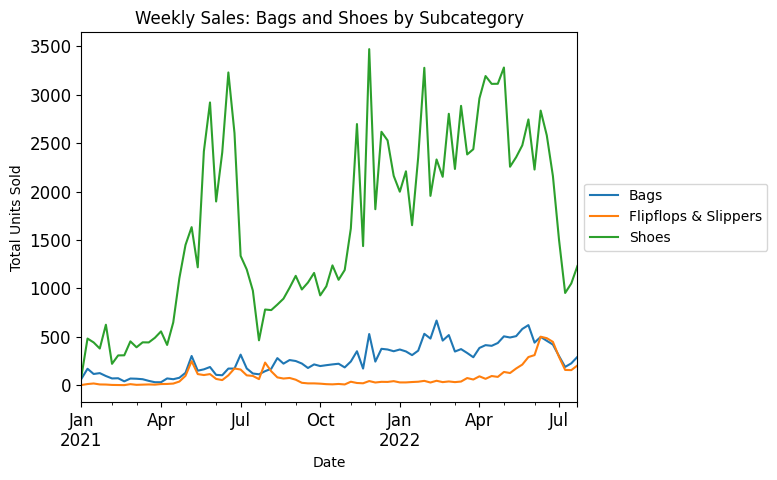

In [99]:
df_bagsandshoes = df[df["item_main_category"]=="Shoes & Bags"]

#print(df_suitsandtops.head())

df_weekly_sub_bagsandshoes = df_bagsandshoes.groupby("item_sub_category")["item_quantity"].resample("W").sum()

df_weekly_sub_bagsandshoes = df_weekly_sub_bagsandshoes.reset_index(level = "item_sub_category")
#print(df_weekly_sub_suitsandtops.head())
df_weekly_unmelt_bagsandshoes = df_weekly_sub_bagsandshoes.pivot_table(values = "item_quantity",  index = "transaction_date", columns = "item_sub_category", aggfunc="first")

# Plot an area chart
ax = df_weekly_unmelt_bagsandshoes.plot(fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.set_ylabel("Total Units Sold")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax.set_title("Weekly Sales: Bags and Shoes by Subcategory")
# Show plot
plt.show()

In [100]:
#Now look at subcategories across all main categories

df_weekly_sub = df.groupby("item_sub_category")["item_quantity"].resample("W").sum()
df_weekly_sub.columns = ["item_sub_category", "item_quantity"]
df_weekly_sub = df_weekly_sub.reset_index(level = "item_sub_category")
print(df_weekly_sub.head())

                 item_sub_category  item_quantity
transaction_date                                 
2021-01-03                    Bags             66
2021-01-10                    Bags            170
2021-01-17                    Bags            116
2021-01-24                    Bags            125
2021-01-31                    Bags             95


In [101]:
df_weekly_sub_unmelt = df_weekly_sub.pivot_table(values = "item_quantity",  index = "transaction_date", columns = "item_sub_category", aggfunc="first")


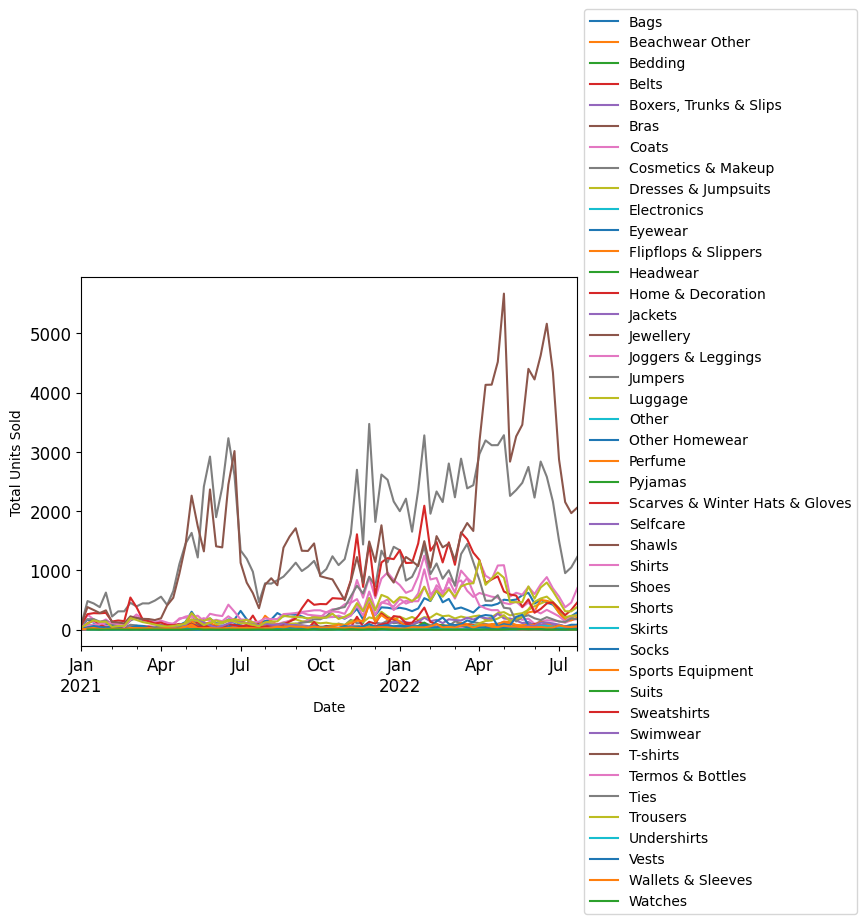

In [102]:
# Plot an area chart
ax = df_weekly_sub_unmelt.plot(fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.set_ylabel("Total Units Sold")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.show()

#Too many subcategories!

In [103]:
#Total sales across the period for each subcat

df_sub_tots = df_weekly_sub_unmelt.sum()

#Get main few
main_subcats = df_sub_tots[df_sub_tots>np.quantile(df_sub_tots, 0.85)].index
print(main_subcats)

Index(['Joggers & Leggings', 'Jumpers', 'Shirts', 'Shoes', 'Sweatshirts',
       'T-shirts', 'Trousers'],
      dtype='object', name='item_sub_category')


In [104]:
#Get a table without the main lines, so we can group and total them as "other"



df_weekly_without_main_subcats = df_weekly_sub[~df_weekly_sub["item_sub_category"].isin([main_subcats])]
print(df_weekly_without_main_subcats.head())





                 item_sub_category  item_quantity
transaction_date                                 
2021-01-03                    Bags             66
2021-01-10                    Bags            170
2021-01-17                    Bags            116
2021-01-24                    Bags            125
2021-01-31                    Bags             95


In [105]:
#Total of other subcats
Other_weekly = df_weekly_sub_unmelt.drop(columns = main_subcats).sum(axis = 1)

#Stick it all together
new_df = pd.concat([df_weekly_sub_unmelt.loc[:,main_subcats], Other_weekly],axis = 1)


new_df = new_df.rename(columns={0: 'Other'})

#new_df = pd.DataFrame({"T-shirts":df_weekly_unmelt.loc[:,"T-shirts"],
#                       "Shoes":df_weekly_unmelt.loc[:,"Shoes"],
#                       "Other": Other_weekly})
new_df.tail()

,Joggers & Leggings,Jumpers,Shirts,Shoes,Sweatshirts,T-shirts,Trousers,Other
transaction_date,,,,,,,,
2022-06-26,280,173,696,2161,460,4344,648,2636.0
2022-07-03,224,136,557,1501,352,2872,483,2078.0
2022-07-10,140,130,377,953,244,2153,310,1430.0
2022-07-17,221,189,457,1051,332,1966,308,1528.0
2022-07-24,244,176,703,1231,461,2062,383,1776.0


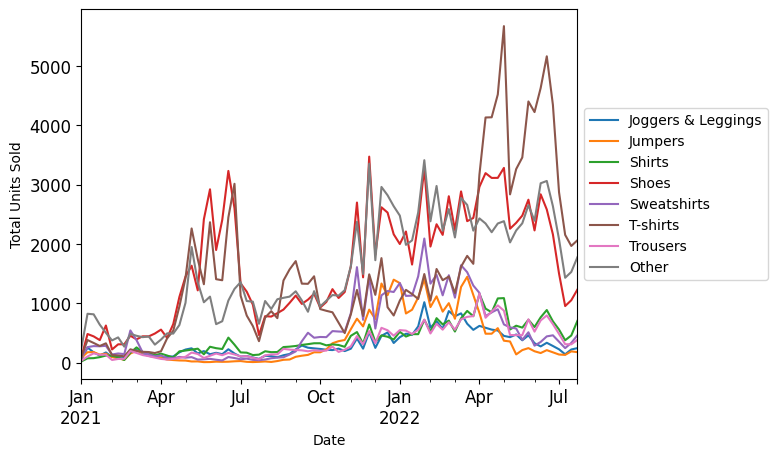

In [106]:
# Plot a chart
ax = new_df.plot(fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.set_ylabel("Total Units Sold")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.show()